In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import glob
import errno

In [35]:

def get_log_time(path):
    path = path.split("/")[-1]
    timestamp = path.split("_")[1]
    hour = timestamp.split("-")[0]
    minute = timestamp.split("-")[1]
    if len(hour) > 2:
        hour=hour[0:2]
    return int(hour), int(minute)

def get_WANdict(prov):
    path = '/Users/nidhikakulawaram/Downloads/cloud_provider_network_consistency_benchmark/ftp_wan/'+ prov + '/*.txt' #note C:
    files = glob.glob(path)
    latency = {}
    throughput = {}
    
    for name in files:
        hour, minute = get_log_time(name)
        try:
            with open(name) as f:
                for line in f:
                    if 'Transferred:' in line: 
                        latency.setdefault(hour,[]).append(line.split()[7])
                    if 'Bytes per second:' in line:
                        throughput.setdefault(hour,[]).append(line.split()[6])
        except IOError as exc: #Not sure what error this is
            if exc.errno != errno.EISDIR:
                raise
    for t in latency.keys():
        latency[t] = latency[t][:10]
        throughput[t] = throughput[t][:10]
    return latency, throughput
    
def get_dict(prov):
    path = '/Users/nidhikakulawaram/Downloads/single-datacenter-ftp-test/'+ prov + '/*.txt' #note C:
    files = glob.glob(path)
    latency = {}
    throughput = {}

    for name in files:
        hour, minute = get_log_time(name)
        try:
            with open(name) as f:
                for line in f:
                    if 'Transferred:' in line: 
                        latency.setdefault(hour,[]).append(line.split()[7])
                    if 'Bytes per second:' in line:
                        throughput.setdefault(hour,[]).append(line.split()[6])
        except IOError as exc: #Not sure what error this is
            if exc.errno != errno.EISDIR:
                raise
    for t in latency.keys():
        latency[t] = latency[t][:10]
        throughput[t] = throughput[t][:10]
    return latency, throughput


def get_dict_minute(prov):
    path = '/Users/nidhikakulawaram/Downloads/single-datacenter-ftp-test/'+ prov + '/*.txt' #note C:
    files = glob.glob(path)
    latency = {}
    throughput = {}

    for name in files:
        hour, minute = get_log_time(name)
        try:
            with open(name) as f:
                for line in f:
                    if 'Transferred:' in line: 
                        latency.setdefault((hour,minute),[]).append(line.split()[7])
                    if 'Bytes per second:' in line:
                        throughput.setdefault((hour,minute),[]).append(line.split()[6])
        except IOError as exc: #Not sure what error this is
            if exc.errno != errno.EISDIR:
                raise
    for t in latency.keys():
        latency[t] = latency[t][:10]
        throughput[t] = throughput[t][:10]
    return latency, throughput


[12, 6, 42, 54, 36, 48, 18, 30, 24, 0]
[1.1, 1.5, 1.4, 1.3, 1.3, 1.4, 1.2, 2.0, 1.4, 2.2]


Text(0, 0.5, 'Latency')

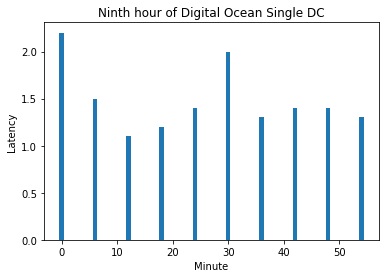

In [36]:
do_min_lat, do_min_thro = get_dict_minute('digital-ocean')
minutes = []
latencies = []
for key in do_min_lat:
    if key[0] == 9:
        minutes.append(key[1])
        latencies.append(do_min_lat[key])
latencies = list(itertools.chain.from_iterable(latencies)) 
latencies = list(map(float, latencies))
print(minutes)
print(latencies)
plt.bar(minutes, latencies)
plt.title('Ninth hour of Digital Ocean Single DC')
plt.xlabel("Minute")
plt.ylabel("Latency")
#     plt.scatter(, ye)
        

[30, 24, 0, 12, 42, 6, 48, 36, 54, 18]
[1.8, 1.2, 2.2, 1.5, 1.2, 1.3, 1.3, 1.8, 1.2, 1.3]


Text(0, 0.5, 'Latency')

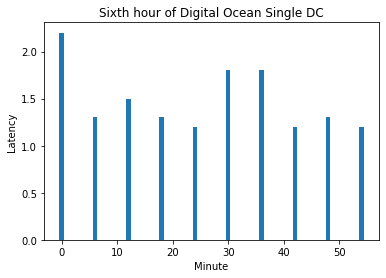

In [37]:
do_min_lat, do_min_thro = get_dict_minute('digital-ocean')
minutes = []
latencies = []
for key in do_min_lat:
    if key[0] == 6:
        minutes.append(key[1])
        latencies.append(do_min_lat[key])
latencies = list(itertools.chain.from_iterable(latencies)) 
latencies = list(map(float, latencies))
print(minutes)
print(latencies)
plt.bar(minutes, latencies)
plt.title('Sixth hour of Digital Ocean Single DC')
plt.xlabel("Minute")
plt.ylabel("Latency")

[54, 36, 48, 18, 12, 6, 42, 0, 30, 24]
[1.2, 1.2, 1.2, 1.2, 1.3, 1.3, 1.2, 1.9, 1.9, 1.3]


Text(0, 0.5, 'Latency')

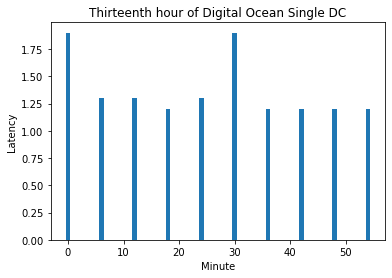

In [38]:
do_min_lat, do_min_thro = get_dict_minute('digital-ocean')
minutes = []
latencies = []
for key in do_min_lat:
    if key[0] == 13:
        minutes.append(key[1])
        latencies.append(do_min_lat[key])
latencies = list(itertools.chain.from_iterable(latencies)) 
latencies = list(map(float, latencies))
print(minutes)
print(latencies)
plt.bar(minutes, latencies)
plt.title('Thirteenth hour of Digital Ocean Single DC')
plt.xlabel("Minute")
plt.ylabel("Latency")

[42, 6, 12, 18, 48, 36, 54, 24, 30, 0]
[1.3, 1.2, 1.3, 1.3, 1.3, 1.2, 1.4, 1.5, 1.9, 1.9]


Text(0, 0.5, 'Latency')

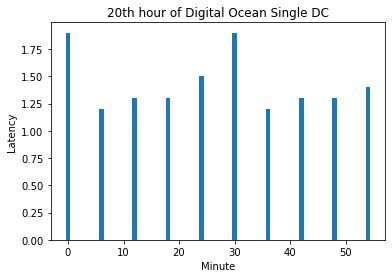

In [39]:
do_min_lat, do_min_thro = get_dict_minute('digital-ocean')
minutes = []
latencies = []
for key in do_min_lat:
    if key[0] == 20:
        minutes.append(key[1])
        latencies.append(do_min_lat[key])
latencies = list(itertools.chain.from_iterable(latencies)) 
latencies = list(map(float, latencies))
print(minutes)
print(latencies)
plt.bar(minutes, latencies)
plt.title('20th hour of Digital Ocean Single DC')
plt.xlabel("Minute")
plt.ylabel("Latency")

[24, 30, 0, 6, 42, 12, 18, 36, 54, 48]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Text(0, 0.5, 'Latency')

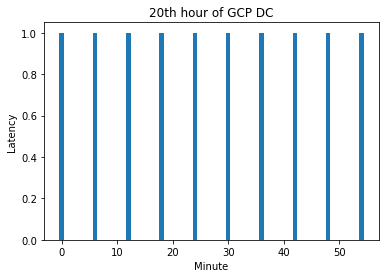

In [40]:
do_min_lat, do_min_thro = get_dict_minute('gcp')
minutes = []
latencies = []
for key in do_min_lat:
    if key[0] == 20:
        minutes.append(key[1])
        latencies.append(do_min_lat[key])
latencies = list(itertools.chain.from_iterable(latencies)) 
latencies = list(map(float, latencies))
print(minutes)
print(latencies)
plt.bar(minutes, latencies)
plt.title('20th hour of GCP DC')
plt.xlabel("Minute")
plt.ylabel("Latency")

[0, 24, 30, 18, 48, 36, 54, 6, 42, 12]
[1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.2, 1.3, 1.1, 1.0]


Text(0, 0.5, 'Latency')

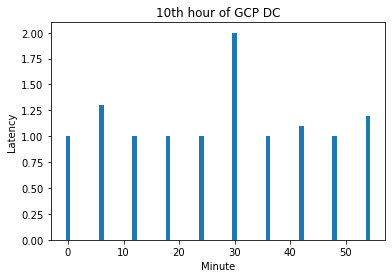

In [41]:
do_min_lat, do_min_thro = get_dict_minute('gcp')
minutes = []
latencies = []
for key in do_min_lat:
    if key[0] == 10:
        minutes.append(key[1])
        latencies.append(do_min_lat[key])
latencies = list(itertools.chain.from_iterable(latencies)) 
latencies = list(map(float, latencies))
print(minutes)
print(latencies)
plt.bar(minutes, latencies)
plt.title('10th hour of GCP DC')
plt.xlabel("Minute")
plt.ylabel("Latency")

[42, 6, 12, 18, 54, 36, 48, 24, 30, 0]
[1.0, 1.0, 1.1, 1.0, 1.0, 1.0, 1.1, 1.0, 1.1, 1.0]


Text(0, 0.5, 'Latency')

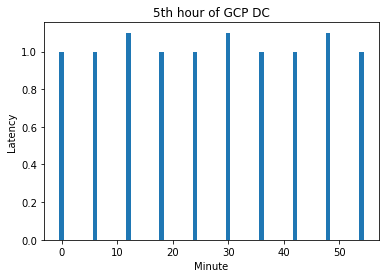

In [42]:
do_min_lat, do_min_thro = get_dict_minute('gcp')
minutes = []
latencies = []
for key in do_min_lat:
    if key[0] == 5:
        minutes.append(key[1])
        latencies.append(do_min_lat[key])
latencies = list(itertools.chain.from_iterable(latencies)) 
latencies = list(map(float, latencies))
print(minutes)
print(latencies)
plt.bar(minutes, latencies)
plt.title('5th hour of GCP DC')
plt.xlabel("Minute")
plt.ylabel("Latency")

In [43]:
def create_ping_scatter_plot(latencies_dict, cloud_provider, is_th = False):
    for xe, ye in zip(latencies_dict.keys(), latencies_dict.values()):
        ye = list(map(float, ye))
        plt.scatter([xe] * len(ye), ye, alpha = 0.5)
        plt.xlabel("Hour of Day (PST)")
        plt.title("{} Single D.C. FTP Test".format(cloud_provider))
        plt.xticks(range(0, 24, 1))
    
    if is_th:
        plt.ylabel("Throughput (bytes/sec)")
    else:
        plt.ylabel("Latency (ms)")
    plt.show()
    return

def create_WAN_scatter_plot(latencies_dict, cloud_provider, is_th =False):
    for i in range(1,8):
        y = latencies_dict[i]
        ye = list(map(float, y))
        plt.scatter([i] * len(ye), ye)
        plt.xlabel("Hour of Day (CST)")
        plt.title("{} WAN FTP Test".format(cloud_provider))
        plt.xticks(range(1, 8, 1))
    if is_th:
        plt.ylabel("Throughput (bytes/sec)")
    else:
        plt.ylabel("Latency (ms)")
    plt.show()
    return

def createWAN_avg_and_std_line_plots(latencies_dict, cloud_provider, is_th =False):
    plt.plot(range(1, 8, 1), [np.mean(list(map(float, latencies_dict[i]))) for i in range(1, 8)], label="avg latency")
    plt.plot(range(1, 8, 1), [np.std(list(map(float, latencies_dict[i]))) for i in range(1, 8)], label="std dev")
    plt.xlabel("Hour of Day (CST)")
    plt.xticks(range(0, 8, 1))
    plt.title("{} WAN FTP Test".format(cloud_provider))
    if is_th:
        plt.ylabel("Avg/Std Dev Throughput (Bytes/Sec)")
    else:
        plt.ylabel("Avg Latency / Std Dev (ms)")
    plt.legend()
    plt.show()


def create_avg_and_std_line_plots(latencies_dict, cloud_provider, is_th=False):
    plt.plot(range(24), [np.mean(np.array(latencies_dict[i]).astype(np.float)) for i in range(24)], label="avg")
    plt.plot(range(24), [np.std(np.array(latencies_dict[i]).astype(np.float)) for i in range(24)], label="std dev")
    plt.xlabel("Hour of Day (UTC)")
    plt.xticks(range(0, 24, 1))
    plt.title("{} Single D.C. FTP Test".format(cloud_provider))
    if is_th:
        plt.ylabel("Avg/Std Dev Throughput (Bytes/Sec)")
    else:
        plt.ylabel("Avg Latency / Std Dev (ms)")
    plt.legend()
    plt.show()

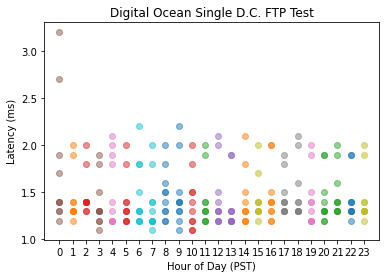

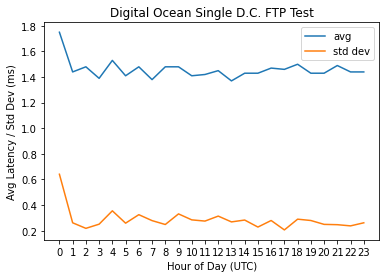

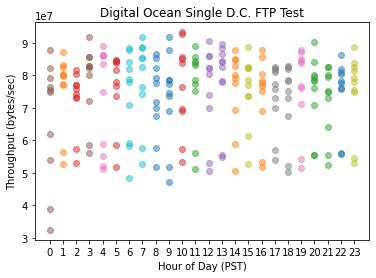

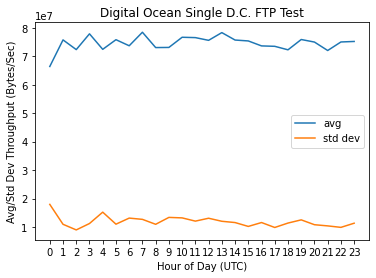

In [45]:
do_latency, do_throughput  = get_dict('digital-ocean')
create_ping_scatter_plot(do_latency, 'Digital Ocean')
#in one hour is the first time you send slower than following??
#do this for gcp too
#1 to 10
create_avg_and_std_line_plots(do_latency, 'Digital Ocean')
create_ping_scatter_plot(do_throughput, 'Digital Ocean', True)
create_avg_and_std_line_plots(do_throughput, 'Digital Ocean', True)

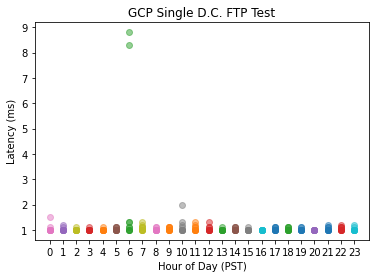

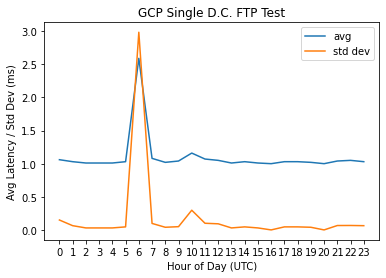

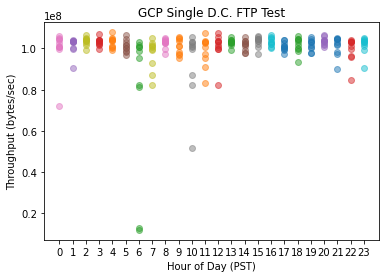

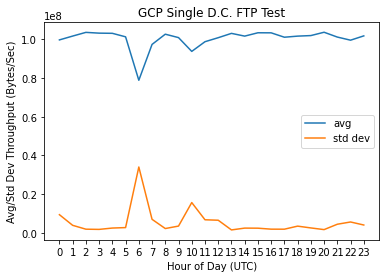

In [46]:
gcp_latency, gcp_throughput  = get_dict('gcp')
create_ping_scatter_plot(gcp_latency, 'GCP')
create_avg_and_std_line_plots(gcp_latency, 'GCP')
create_ping_scatter_plot(gcp_throughput, 'GCP', True)
create_avg_and_std_line_plots(gcp_throughput, 'GCP', True)
#change ms to s
#zoom in on plot for y axis 1-6.5
#can see outliers in std

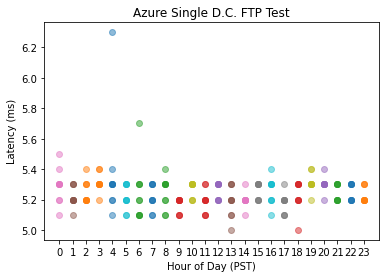

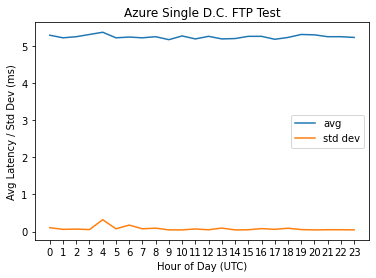

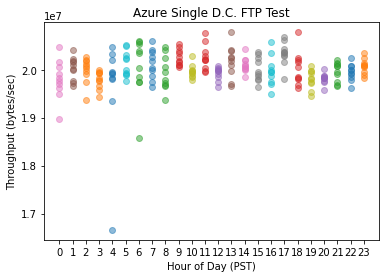

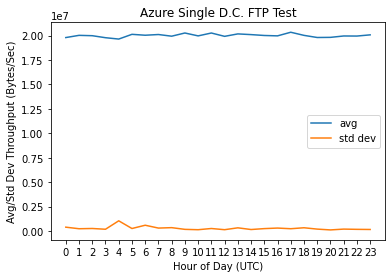

In [479]:
az_latency, az_throughput  = get_dict('azure')
create_ping_scatter_plot(az_latency, 'Azure')
create_avg_and_std_line_plots(az_latency, 'Azure')
create_ping_scatter_plot(az_throughput, 'Azure', True)
create_avg_and_std_line_plots(az_throughput, 'Azure', True)

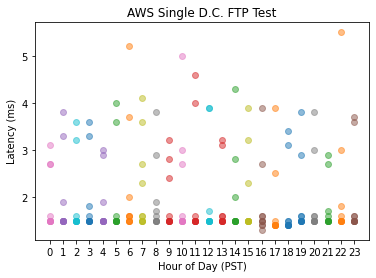

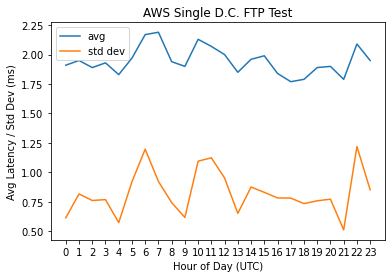

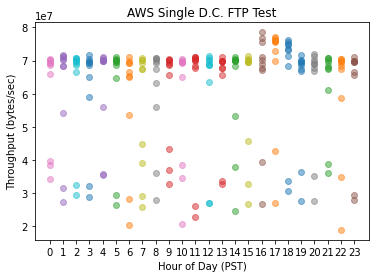

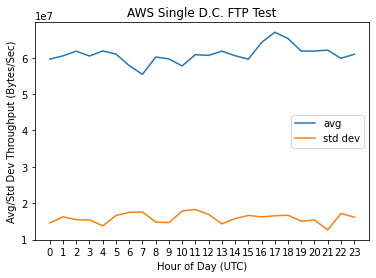

In [480]:
aws_latency, aws_throughput  = get_dict('AWS_scplogs')
create_ping_scatter_plot(aws_latency, 'AWS')
create_avg_and_std_line_plots(aws_latency, 'AWS')
create_ping_scatter_plot(aws_throughput, 'AWS', True)
create_avg_and_std_line_plots(aws_throughput, 'AWS', True)

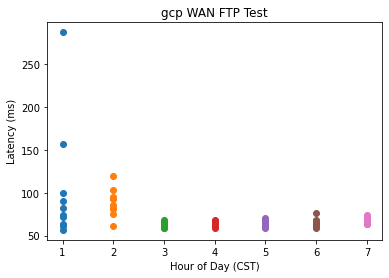

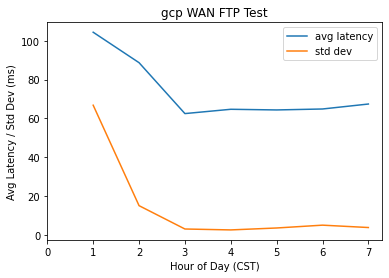

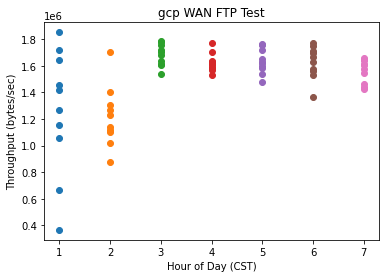

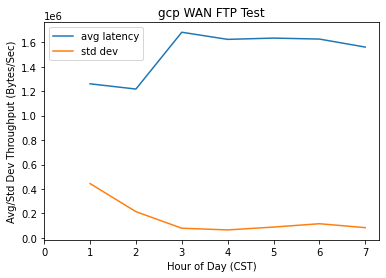

In [481]:
WANgcp_latency, WANgcp_throughput = get_WANdict('gcp')
create_WAN_scatter_plot(WANgcp_latency, 'gcp')
createWAN_avg_and_std_line_plots(WANgcp_latency, 'gcp')
create_WAN_scatter_plot(WANgcp_throughput, 'gcp', True)
createWAN_avg_and_std_line_plots(WANgcp_throughput, 'gcp', True)
#plot from 3-7am!

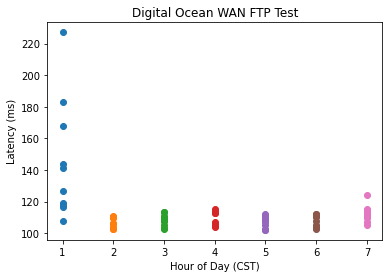

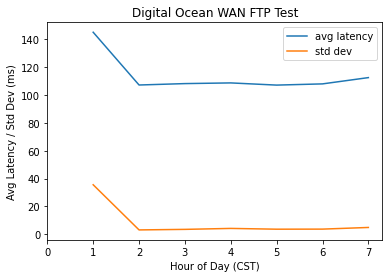

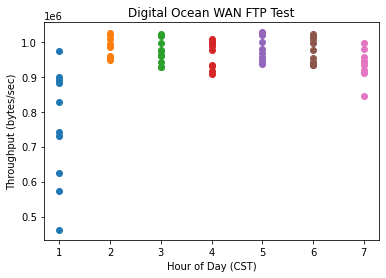

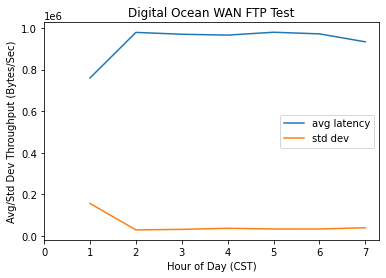

In [482]:
WANdo_latency, WANdo_throughput = get_WANdict('do')
create_WAN_scatter_plot(WANdo_latency, 'Digital Ocean')
createWAN_avg_and_std_line_plots(WANdo_latency, 'Digital Ocean')
create_WAN_scatter_plot(WANdo_throughput, 'Digital Ocean', True)
createWAN_avg_and_std_line_plots(WANdo_throughput, 'Digital Ocean', True)

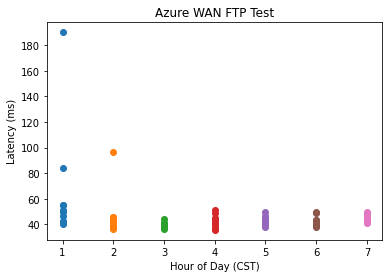

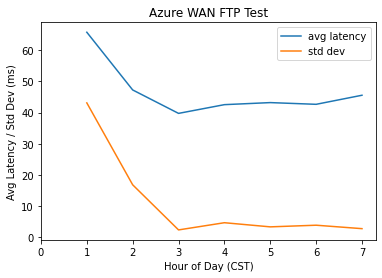

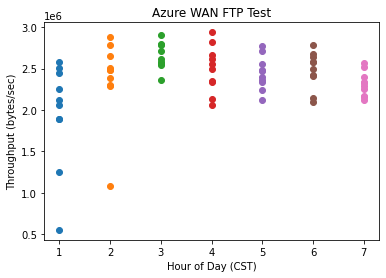

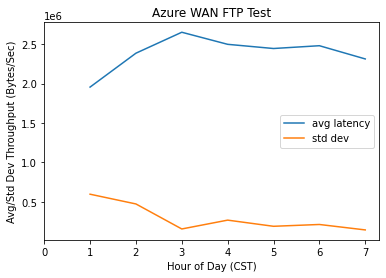

In [499]:
WANaz_latency, WANaz_throughput = get_WANdict('azure')
create_WAN_scatter_plot(WANaz_latency, 'Azure')
createWAN_avg_and_std_line_plots(WANaz_latency, 'Azure')
create_WAN_scatter_plot(WANaz_throughput, 'Azure', True)
createWAN_avg_and_std_line_plots(WANaz_throughput, 'Azure', True)

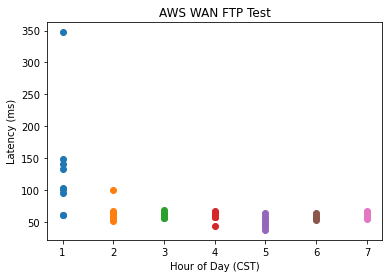

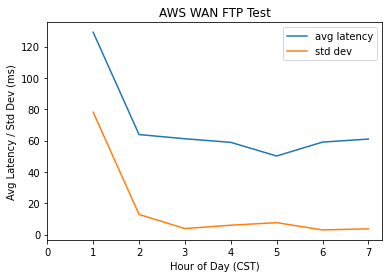

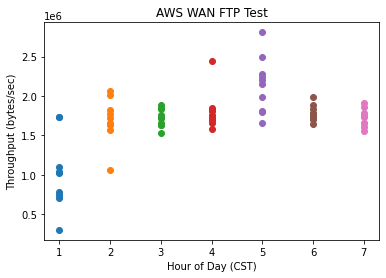

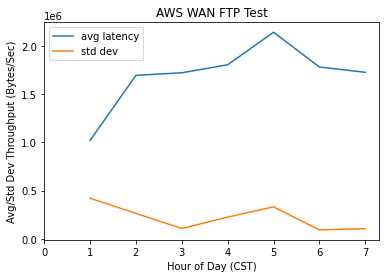

In [500]:
WANaws_latency, WANaws_throughput = get_WANdict('aws')
create_WAN_scatter_plot(WANaws_latency, 'AWS')
createWAN_avg_and_std_line_plots(WANaws_latency, 'AWS')
create_WAN_scatter_plot(WANaws_throughput, 'AWS', True)
createWAN_avg_and_std_line_plots(WANaws_throughput, 'AWS', True)

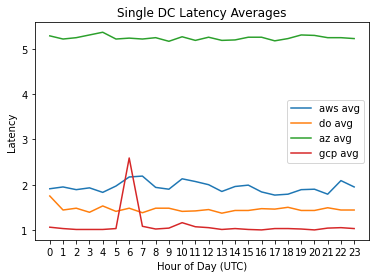

In [484]:
provs = [aws_latency, do_latency, az_latency, gcp_latency]
# for p in provs:
plt.plot(range(24), [np.mean(np.array(aws_latency[i]).astype(np.float)) for i in range(24)], label="aws avg")
plt.plot(range(24), [np.mean(np.array(do_latency[i]).astype(np.float)) for i in range(24)], label="do avg")
plt.plot(range(24), [np.mean(np.array(az_latency[i]).astype(np.float)) for i in range(24)], label="az avg")
plt.plot(range(24), [np.mean(np.array(gcp_latency[i]).astype(np.float)) for i in range(24)], label="gcp avg")
#plt.plot(range(24), [np.std(np.array(p[i]).astype(np.float)) for i in range(24)], label="std dev")
plt.xlabel("Hour of Day (UTC)")
plt.xticks(range(0, 24, 1))
plt.title('Single DC Latency Averages')
plt.ylabel("Latency")
#plt.title("{} Single D.C. FTP Test".format(cloud_provider))
#     if is_th:
#         plt.ylabel("Avg/Std Dev Throughput (Bytes/Sec)")
#     else:
#         plt.ylabel("Avg Latency / Std Dev (ms)")
plt.legend()
plt.show()

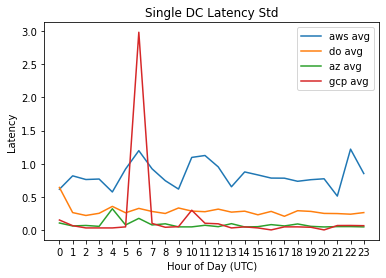

In [497]:
provs = [aws_latency, do_latency, az_latency, gcp_latency]
# for p in provs:
plt.plot(range(24), [np.std(np.array(aws_latency[i]).astype(np.float)) for i in range(24)], label="aws std")
plt.plot(range(24), [np.std(np.array(do_latency[i]).astype(np.float)) for i in range(24)], label="do std")
plt.plot(range(24), [np.std(np.array(az_latency[i]).astype(np.float)) for i in range(24)], label="az std")
plt.plot(range(24), [np.std(np.array(gcp_latency[i]).astype(np.float)) for i in range(24)], label="gcp std")
#plt.plot(range(24), [np.std(np.array(p[i]).astype(np.float)) for i in range(24)], label="std dev")
plt.xlabel("Hour of Day (UTC)")
plt.xticks(range(0, 24, 1))
plt.title('Single DC Latency Std')
plt.ylabel("Latency")
#plt.title("{} Single D.C. FTP Test".format(cloud_provider))
#     if is_th:
#         plt.ylabel("Avg/Std Dev Throughput (Bytes/Sec)")
#     else:
#         plt.ylabel("Avg Latency / Std Dev (ms)")
plt.legend()
plt.show()

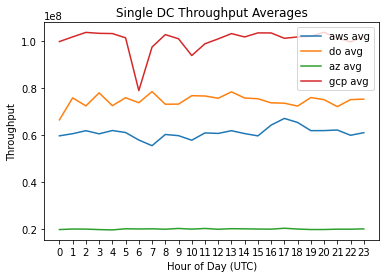

In [487]:

# for p in provs:
plt.plot(range(24), [np.mean(np.array(aws_throughput[i]).astype(np.float)) for i in range(24)], label="aws avg")
plt.plot(range(24), [np.mean(np.array(do_throughput[i]).astype(np.float)) for i in range(24)], label="do avg")
plt.plot(range(24), [np.mean(np.array(az_throughput[i]).astype(np.float)) for i in range(24)], label="az avg")
plt.plot(range(24), [np.mean(np.array(gcp_throughput[i]).astype(np.float)) for i in range(24)], label="gcp avg")
#plt.plot(range(24), [np.std(np.array(p[i]).astype(np.float)) for i in range(24)], label="std dev")
plt.xlabel("Hour of Day (UTC)")
plt.xticks(range(0, 24, 1))
plt.title('Single DC Throughput Averages')
plt.ylabel("Throughput")
#plt.title("{} Single D.C. FTP Test".format(cloud_provider))
#     if is_th:
#         plt.ylabel("Avg/Std Dev Throughput (Bytes/Sec)")
#     else:
#         plt.ylabel("Avg Latency / Std Dev (ms)")
plt.legend()
plt.show()

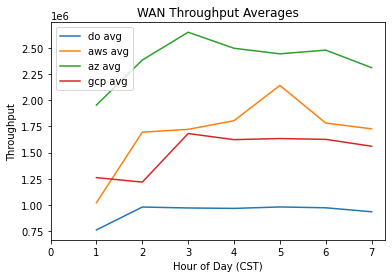

In [503]:

plt.plot(range(1, 8, 1), [np.mean(list(map(float, WANdo_throughput[i]))) for i in range(1, 8)], label="do avg")
plt.plot(range(1, 8, 1), [np.mean(list(map(float, WANaws_throughput[i]))) for i in range(1, 8)], label="aws avg")
plt.plot(range(1, 8, 1), [np.mean(list(map(float, WANaz_throughput[i]))) for i in range(1, 8)], label="az avg")
plt.plot(range(1, 8, 1), [np.mean(list(map(float, WANgcp_throughput[i]))) for i in range(1, 8)], label="gcp avg")

plt.xlabel("Hour of Day (CST)")
plt.xticks(range(0, 8, 1))
plt.title('WAN Throughput Averages')
plt.ylabel("Throughput")

plt.legend()
plt.show()

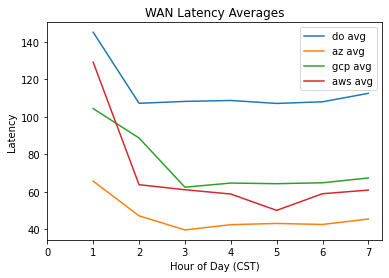

In [504]:
plt.plot(range(1, 8, 1), [np.mean(list(map(float, WANdo_latency[i]))) for i in range(1, 8)], label="do avg")
plt.plot(range(1, 8, 1), [np.mean(list(map(float, WANaz_latency[i]))) for i in range(1, 8)], label="az avg")
plt.plot(range(1, 8, 1), [np.mean(list(map(float, WANgcp_latency[i]))) for i in range(1, 8)], label="gcp avg")
plt.plot(range(1, 8, 1), [np.mean(list(map(float, WANaws_latency[i]))) for i in range(1, 8)], label="aws avg")

plt.xlabel("Hour of Day (CST)")
plt.xticks(range(0, 8, 1))
plt.title('WAN Latency Averages')
plt.ylabel("Latency")

plt.legend()
plt.show()

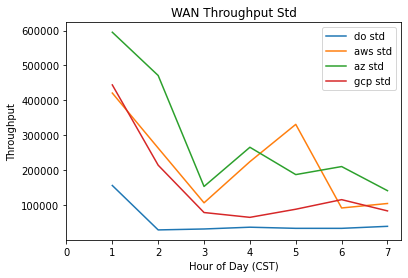

In [507]:
plt.plot(range(1, 8, 1), [np.std(list(map(float, WANdo_throughput[i]))) for i in range(1, 8)], label="do std")
plt.plot(range(1, 8, 1), [np.std(list(map(float, WANaws_throughput[i]))) for i in range(1, 8)], label="aws std")
plt.plot(range(1, 8, 1), [np.std(list(map(float, WANaz_throughput[i]))) for i in range(1, 8)], label="az std")
plt.plot(range(1, 8, 1), [np.std(list(map(float, WANgcp_throughput[i]))) for i in range(1, 8)], label="gcp std")

plt.xlabel("Hour of Day (CST)")
plt.xticks(range(0, 8, 1))
plt.title('WAN Throughput Std')
plt.ylabel("Throughput")

plt.legend()
plt.show()

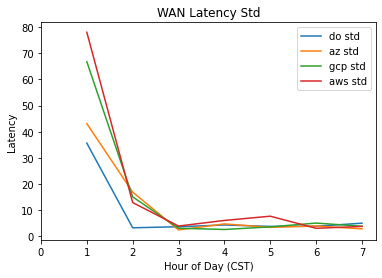

In [508]:
plt.plot(range(1, 8, 1), [np.std(list(map(float, WANdo_latency[i]))) for i in range(1, 8)], label="do std")
plt.plot(range(1, 8, 1), [np.std(list(map(float, WANaz_latency[i]))) for i in range(1, 8)], label="az std")
plt.plot(range(1, 8, 1), [np.std(list(map(float, WANgcp_latency[i]))) for i in range(1, 8)], label="gcp std")
plt.plot(range(1, 8, 1), [np.std(list(map(float, WANaws_latency[i]))) for i in range(1, 8)], label="aws std")

plt.xlabel("Hour of Day (CST)")
plt.xticks(range(0, 8, 1))
plt.title('WAN Latency Std')
plt.ylabel("Latency")

plt.legend()
plt.show()